In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import string

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load and preprocess the dataset
data = pd.read_csv('Twitter_Data.csv')
data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
# Convert 'clean_text' column to strings
data['clean_text'] = data['text'].astype(str)
# data['clean_text'] = data['clean_text'].str.replace('[^a-zA-Z\s]', '').str.lower()
data

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"Sons of ****, why couldn`t they put them on t..."
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see u on Denver husband l...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,I`ve wondered about rake to. The client has ...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,Yay good for both of you. Enjoy the break - y...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,But it was worth it ****.


In [7]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+', '', text)
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip())
    cleaned_text = " ".join(final_text)

    # Check if the cleaned text is empty
    if not cleaned_text:
        cleaned_text = "placeholder"  # Add a placeholder word

    return cleaned_text

data['clean_text'] = data['clean_text'].apply(clean_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\800808489.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


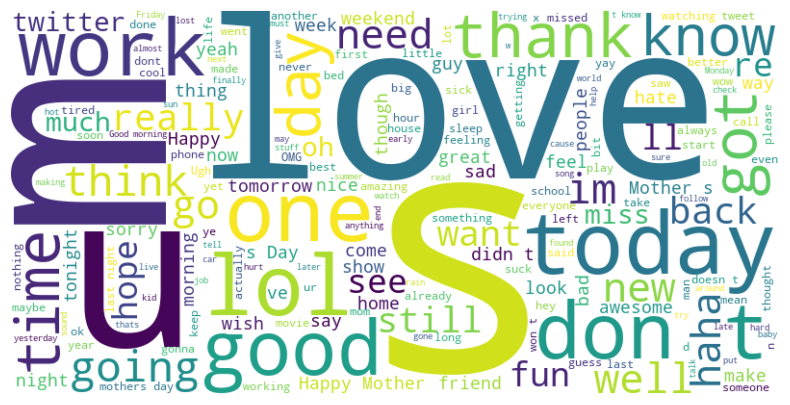

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
text_data = " ".join(review for review in data['clean_text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [9]:
# Split data into training and testing sets
X = data['clean_text']
y = data['sentiment']


In [10]:
# Check unique values in the 'sentiment' column
unique_sentiments = y.unique()
print("Unique Sentiments:", unique_sentiments)

# Ensure that your labels are numeric
y = y.replace({'negative': 0, 'neutral': 1, 'positive': 2})

Unique Sentiments: ['neutral' 'negative' 'positive']


C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\3927461262.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'negative': 0, 'neutral': 1, 'positive': 2})


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Tokenize and pad text sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post')


In [13]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [14]:
# One-hot encode labels
num_classes = len(unique_sentiments)
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)


In [15]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

# Build a simple LSTM model with 3 output units
model = tf.keras.Sequential([
    Embedding(input_dim=5000, output_dim=100, input_length=100),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a reduced batch size
model.fit(X_train_pad, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_onehot))

c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 61s 84ms/step - accuracy: 0.3943 - loss: 1.0908 - val_accuracy: 0.4057 - val_loss: 1.0873
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.4070 - loss: 1.0871 - val_accuracy: 0.4057 - val_loss: 1.0868
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 58s 84ms/step - accuracy: 0.4067 - loss: 1.0864 - val_accuracy: 0.4057 - val_loss: 1.0867
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - accuracy: 0.4127 - loss: 1.0853 - val_accuracy: 0.4057 - val_loss: 1.0868
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 59s 86ms/step - accuracy: 0.4000 - loss: 1.0885 - val_accuracy: 0.4057 - val_loss: 1.0867


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# Hyperparameters
vocab_size = 10000  # Vocabulary size for embedding layer
embedding_dim = 100  # Embedding vector size
max_len = 100  # Input sequence length
batch_size = 32  # Batch size for training
epochs = 5  # Increased number of epochs for more training
# Build the Sequential Model with Bidirectional GRU
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Dropout(0.3),  # Lower dropout to retain more information
    Bidirectional(GRU(64, return_sequences=True)),  # Increased number of units
    Dropout(0.3),  # Lower dropout to retain more information
    Bidirectional(GRU(32)),  # Another GRU layer
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Keep higher dropout for final dense layer
    Dense(3, activation='softmax')  # Output layer for 3 sentiment classes
])
# Compile the Model
model.compile(
    optimizer='adam',  # You can also try other optimizers
    loss='sparse_categorical_crossentropy',  # Use sparse loss for integer labels
    metrics=['accuracy']
)
# Display the Model Summary
# Set Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the Model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)
# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
 
 

Epoch 1/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 107s 129ms/step - accuracy: 0.5123 - loss: 0.9657 - val_accuracy: 0.7129 - val_loss: 0.6949
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 88s 128ms/step - accuracy: 0.7481 - loss: 0.6449 - val_accuracy: 0.7238 - val_loss: 0.6824
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 76s 110ms/step - accuracy: 0.7709 - loss: 0.5883 - val_accuracy: 0.7188 - val_loss: 0.6912
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 86s 125ms/step - accuracy: 0.7946 - loss: 0.5330 - val_accuracy: 0.7104 - val_loss: 0.7176
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 79s 115ms/step - accuracy: 0.8220 - loss: 0.4746 - val_accuracy: 0.6977 - val_loss: 0.7437
172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7205 - loss: 0.6846
Test Loss: 0.6824, Test Accuracy: 0.7238


In [17]:
# Build a deeper LSTM model with regularization
model = tf.keras.Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),  # Increased embedding dimension
    LSTM(128, return_sequences=True),                             # First LSTM layer with return_sequences=True
    Dropout(0.3),
    LSTM(64, return_sequences=True),                              # Second LSTM layer to learn complex patterns
    Dropout(0.2),
    LSTM(32),                                                     # Final LSTM layer
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Dense layer with L2 regularization
    Dropout(0.2),
    Dense(num_classes, activation='sigmoid')                      # Output layer with softmax for multi-class classification
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and a smaller batch size
model.fit(X_train_pad, y_train_onehot, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_onehot))


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 116s 299ms/step - accuracy: 0.3978 - loss: 1.1178 - val_accuracy: 0.4057 - val_loss: 1.0951
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 101s 293ms/step - accuracy: 0.4047 - loss: 1.0941 - val_accuracy: 0.4057 - val_loss: 1.0898
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 87s 254ms/step - accuracy: 0.4042 - loss: 1.0901 - val_accuracy: 0.4057 - val_loss: 1.0878
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 77s 224ms/step - accuracy: 0.4015 - loss: 1.0891 - val_accuracy: 0.4057 - val_loss: 1.0874
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 78s 228ms/step - accuracy: 0.4081 - loss: 1.0868 - val_accuracy: 0.4057 - val_loss: 1.0870
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 86s 251ms/step - accuracy: 0.4013 - loss: 1.0878 - val_accuracy: 0.4057 - val_loss: 1.0867
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 91s 265ms/step - accuracy: 0.4099 - loss: 1.0851 - val_accuracy: 0.4057 - val_loss: 1.0868
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 94s 274ms/step - accuracy: 0.4099 - loss:

In [18]:
# Save the trained model
model.save('sentiment_model.h5')
dump(tokenizer, 'tokenizer.joblib')

['tokenizer.joblib']

In [19]:

# # Build the LSTM model with Batch Normalization
# model = tf.keras.Sequential([
#     Embedding(input_dim=5000, output_dim=128, input_length=100),
#     LSTM(128, return_sequences=True),
#     BatchNormalization(),
#     Dropout(0.5),
#     LSTM(64),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model
model = tf.keras.models.load_model('sentiment_model.h5')

# Load the tokenizer
tokenizer = Tokenizer(num_words=5000)  # Set the same number as used during training

# Define the maximum sequence length (same as used during training)
max_length = 100

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize and pad the input text
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, truncating='post')

    # Predict the sentiment
    prediction = model.predict(padded)

    return prediction

# Static input text
sample_text = "I loved the movie! It was fantastic and had a great storyline."

# Predict sentiment for the static input
prediction = predict_sentiment(sample_text)
print("prediction----",prediction)
# Determine the sentiment based on the prediction
sentiment = ["Negative", "Neutral", "Positive"][prediction.argmax()]

# Display the result
print(f"Text: {sample_text}")
print(f"Predicted Sentiment: {sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
prediction---- [[0.46450567 0.5537678  0.48820168]]
Text: I loved the movie! It was fantastic and had a great storyline.
Predicted Sentiment: Neutral


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from joblib import dump

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Save the TF-IDF vectorizer
dump(tfidf, 'tfidf_vectorizer.joblib')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode labels
num_classes = len(unique_sentiments)
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)

# Build a simple dense neural network model for classification
model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_test_tfidf, y_test_onehot))


c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4901 - loss: 0.9830 - val_accuracy: 0.6844 - val_loss: 0.7352
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7308 - loss: 0.6602 - val_accuracy: 0.6915 - val_loss: 0.7195
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7930 - loss: 0.5426 - val_accuracy: 0.6889 - val_loss: 0.7440
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8291 - loss: 0.4617 - val_accuracy: 0.6898 - val_loss: 0.7914
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8649 - loss: 0.3811 - val_accuracy: 0.6816 - val_loss: 0.8516
